In [2]:
import pandas as pd
from sklearn.metrics import f1_score

In [3]:
wag_params = pd.read_parquet('train/wag_params.parquet').convert_dtypes()
wag_params.head()

,wagnum,model,rod_id,gruz,cnsi_gruz_capacity,cnsi_volumek,tara,date_build,srok_sl,zavod_build,date_iskl,cnsi_probeg_dr,cnsi_probeg_kr,kuzov,telega,tormoz,tipvozd,tippogl,norma_km,ownertype
3218,26318,12-600-04,1,682,682,85.0,240,1992-12-25,2022-04-27,5,2023-02-16,160,160,2,9,3,6,11,110000,0
19128,28344,12-132,1,700,700,88.0,240,2003-08-12,2024-12-24,0,2022-12-14,110,160,2,9,2,1,12,0,0
21526,8099,11-286,0,670,670,138.0,270,1995-08-31,2027-10-01,1,NaT,110,160,2,9,2,1,1,160000,1
32353,33350,12-9850-02,1,750,750,90.0,248,2014-10-27,2047-02-05,19,NaT,250,500,2,11,2,7,12,250000,1
81,5308,11-276,0,680,680,122.0,260,1995-09-17,2027-09-28,1,NaT,110,160,2,9,2,1,11,160000,1


In [4]:
wag_params['rod_id'].value_counts()

1    20785
0    13192
Name: rod_id, dtype: Int64

In [5]:
wag_params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33977 entries, 3218 to 33707
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   wagnum              33977 non-null  Int64         
 1   model               33977 non-null  string        
 2   rod_id              33977 non-null  Int64         
 3   gruz                33977 non-null  Int64         
 4   cnsi_gruz_capacity  33977 non-null  Int64         
 5   cnsi_volumek        33977 non-null  Float64       
 6   tara                33977 non-null  Int64         
 7   date_build          33977 non-null  datetime64[ns]
 8   srok_sl             33977 non-null  datetime64[ns]
 9   zavod_build         33977 non-null  Int64         
 10  date_iskl           116 non-null    datetime64[ns]
 11  cnsi_probeg_dr      33977 non-null  Int64         
 12  cnsi_probeg_kr      33977 non-null  Int64         
 13  kuzov               33977 non-null  Int64  

In [6]:
wag_params['tipvozd'].value_counts()

7     17047
1      7929
4      2984
6      2308
19     1362
16     1148
10      636
8       462
3        68
21       30
2         2
9         1
Name: tipvozd, dtype: Int64

In [7]:
wag_params.describe()

,wagnum,rod_id,gruz,cnsi_gruz_capacity,cnsi_volumek,tara,zavod_build,cnsi_probeg_dr,cnsi_probeg_kr,kuzov,telega,tormoz,tippogl,norma_km,ownertype
count,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33977.0,33918.0,33977.0,33977.0
mean,16988.0,0.611737,688.714101,688.714101,111.040586,249.879154,3.21959,123.393178,171.844483,6.885158,8.460076,2.187656,10.040981,164723.195103,0.077199
std,9808.459385,0.487362,15.580777,15.580777,30.912871,13.399171,5.753529,49.404179,56.292032,10.748415,4.058315,0.391723,3.489276,55328.136262,0.266911
min,0.0,0.0,660.0,660.0,73.0,217.0,0.0,110.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
25%,8494.0,0.0,672.0,672.0,88.0,240.0,0.0,110.0,160.0,2.0,9.0,2.0,11.0,160000.0,0.0
50%,16988.0,1.0,695.0,695.0,88.0,243.0,1.0,110.0,160.0,2.0,9.0,2.0,11.0,160000.0,0.0
75%,25482.0,1.0,695.0,695.0,138.0,265.0,2.0,110.0,160.0,2.0,9.0,2.0,11.0,160000.0,0.0
max,33976.0,1.0,750.0,750.0,174.0,273.0,23.0,350.0,500.0,43.0,27.0,3.0,21.0,500000.0,1.0


In [8]:
wagons_probeg_ownersip = pd.read_parquet('train/wagons_probeg_ownersip.parquet').convert_dtypes()
wagons_probeg_ownersip.head()

,repdate,wagnum,ost_prob,manage_type,rod_id,reestr_state,ownership_type,month
0,2022-08-01,33361,7541,0,1,1,0,8
1,2022-08-02,33361,7243,0,1,1,0,8
2,2022-08-03,33361,6990,0,1,1,0,8
3,2022-08-04,33361,6347,0,1,1,0,8
4,2022-08-05,33361,6027,0,1,1,0,8


In [9]:
wagons_probeg_ownersip.describe()

,wagnum,ost_prob,manage_type,rod_id,reestr_state,ownership_type,month
count,6249857.0,5992898.0,6249857.0,6249857.0,6249857.0,6249857.0,6249857.0
mean,16990.016822,87916.423663,0.06577,0.611887,1.000644,0.0,8.485699
std,9808.047671,71430.597863,0.24788,0.487321,0.027175,0.0,3.606935
min,0.0,-48906.0,0.0,0.0,0.0,0.0,1.0
25%,8499.0,34619.0,0.0,0.0,1.0,0.0,8.0
50%,16992.0,78306.5,0.0,1.0,1.0,0.0,10.0
75%,25484.0,130621.0,0.0,1.0,1.0,0.0,11.0
max,33976.0,500000.0,1.0,1.0,2.0,0.0,12.0


In [10]:
wagons_probeg_ownersip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249857 entries, 0 to 9249588
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   repdate         datetime64[ns]
 1   wagnum          Int64         
 2   ost_prob        Int64         
 3   manage_type     Int64         
 4   rod_id          Int64         
 5   reestr_state    Int64         
 6   ownership_type  Int64         
 7   month           Int64         
dtypes: Int64(7), datetime64[ns](1)
memory usage: 470.9 MB


In [11]:
wagons_probeg_ownersip['wagnum'].value_counts()

33361    184
6957     184
18712    184
8667     184
25799    184
        ... 
8061     148
26318    144
28344    134
8099     128
33350     41
Name: wagnum, Length: 33977, dtype: Int64

In [12]:
wagons_probeg_ownersip['wagnum'].nunique()

33977

<Axes: xlabel='repdate'>

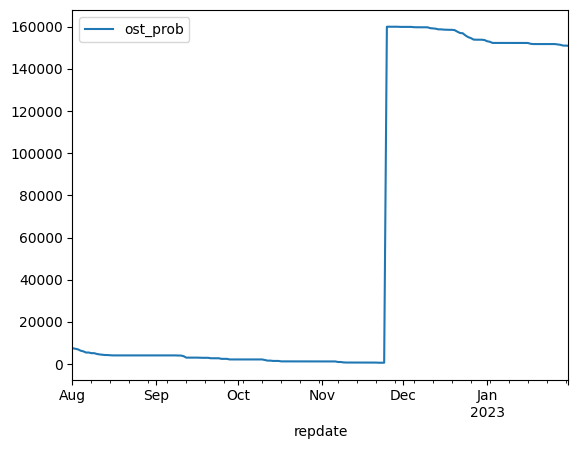

In [13]:
ts = wagons_probeg_ownersip[wagons_probeg_ownersip['wagnum'] == 33361][['repdate', 'ost_prob']]
ts.plot('repdate', 'ost_prob')

<Axes: >

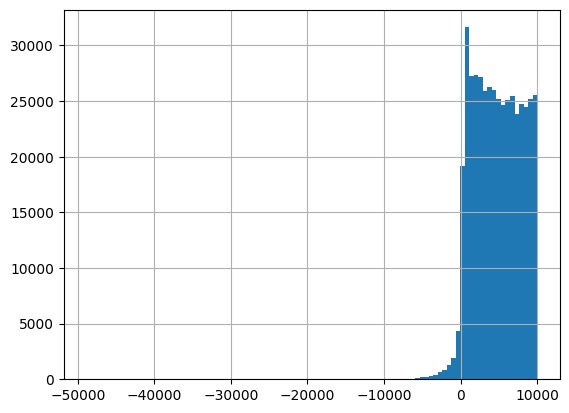

In [14]:
wagons_probeg_ownersip[wagons_probeg_ownersip['ost_prob']<10000]['ost_prob'].hist(bins=100)

<Axes: >

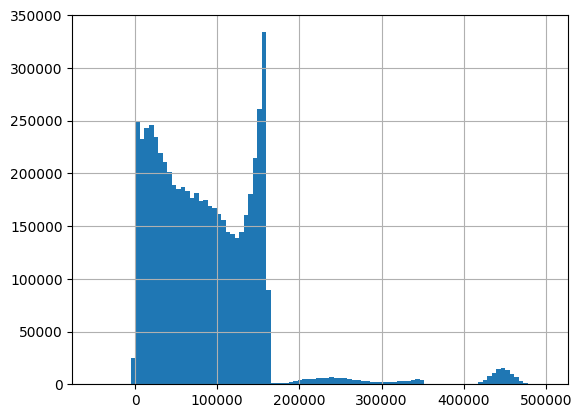

In [15]:
wagons_probeg_ownersip['ost_prob'].hist(bins=100)

In [16]:
ts_1 = ts.set_index('repdate')
ts_1

,ost_prob
repdate,
2022-08-01,7541
2022-08-02,7243
2022-08-03,6990
2022-08-04,6347
2022-08-05,6027
...,...
2023-01-27,151623
2023-01-28,151419
2023-01-29,151055


In [17]:
kti_izm_feb = pd.read_parquet('train/kti_izm_feb.parquet').convert_dtypes()
kti_izm_feb.head()

,wagnum,operation_date_dttm,mileage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,axl1_l_w_rim,axl1_r_w_rim,axl2_l_w_rim,axl2_r_w_rim,axl3_l_w_rim,axl3_r_w_rim,axl4_l_w_rim,axl4_r_w_rim
43,1302,2023-02-17,67638,29.6,29.5,30.0,29.6,30.2,29.9,30.9,29.5,37.8,39.2,39.5,38.9,41.8,38.9,36.5,38.2
60,1374,2023-02-25,83798,29.1,27.9,27.7,29.1,29.3,30.2,29.4,27.5,48.9,49.0,49.7,51.0,30.7,32.4,30.6,28.8
137,2916,2023-02-21,121660,30.4,26.5,30.8,28.2,26.9,27.1,29.8,31.2,69.2,66.7,66.8,63.7,66.1,66.3,68.1,67.6
196,3849,2023-02-19,59664,30.6,29.2,31.6,28.5,31.0,30.7,29.3,30.0,75.1,76.1,74.8,73.7,75.6,76.8,72.2,72.9
197,3849,2023-02-20,59664,30.9,28.7,32.4,28.1,31.0,29.7,30.5,29.9,75.6,76.8,74.1,74.7,75.8,77.0,74.9,74.2


In [18]:
kti_izm_feb['wagnum'].value_counts()

31902    14
26132    13
18051    13
32583    12
33973    12
         ..
5511      1
5527      1
5529      1
19307     1
29168     1
Name: wagnum, Length: 6686, dtype: Int64

<Axes: >

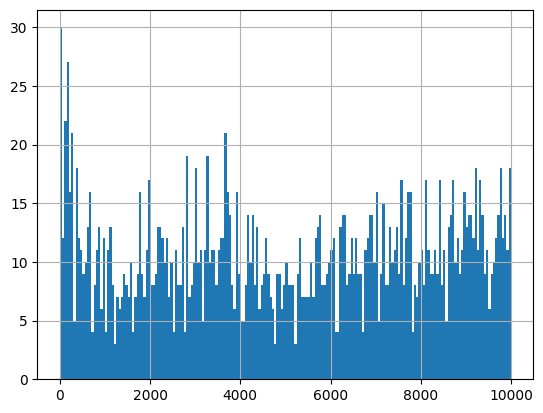

In [19]:
kti_izm_feb[kti_izm_feb['mileage_all'] < 10000]['mileage_all'].hist(bins=200)

In [20]:
kti_izm_feb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22428 entries, 43 to 212366
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   wagnum               22428 non-null  Int64         
 1   operation_date_dttm  22428 non-null  datetime64[ns]
 2   mileage_all          22155 non-null  Int64         
 3   axl1_l_w_flange      22416 non-null  Float64       
 4   axl1_r_w_flange      22409 non-null  Float64       
 5   axl2_l_w_flange      22412 non-null  Float64       
 6   axl2_r_w_flange      22408 non-null  Float64       
 7   axl3_l_w_flange      22411 non-null  Float64       
 8   axl3_r_w_flange      22407 non-null  Float64       
 9   axl4_l_w_flange      22413 non-null  Float64       
 10  axl4_r_w_flange      22416 non-null  Float64       
 11  axl1_l_w_rim         22287 non-null  Float64       
 12  axl1_r_w_rim         22296 non-null  Float64       
 13  axl2_l_w_rim         22293 no

In [21]:
kti_izm_feb.describe()

,wagnum,mileage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,axl1_l_w_rim,axl1_r_w_rim,axl2_l_w_rim,axl2_r_w_rim,axl3_l_w_rim,axl3_r_w_rim,axl4_l_w_rim,axl4_r_w_rim
count,22428.0,22155.0,22416.0,22409.0,22412.0,22408.0,22411.0,22407.0,22413.0,22416.0,22287.0,22296.0,22293.0,22292.0,22251.0,22273.0,22306.0,22318.0
mean,19683.387462,73033.907967,29.125397,29.094069,29.135227,29.175473,29.085556,29.050886,29.204078,29.22972,61.914233,61.904517,60.934675,60.933617,60.857292,60.833345,61.85672,61.822605
std,8668.476126,50476.484761,1.666071,1.674003,1.711203,1.683929,1.666508,1.690736,1.709619,1.678164,11.347351,11.364116,11.743708,11.724126,11.792706,11.773329,11.384352,11.367269
min,0.0,1.0,23.5,23.4,23.7,23.8,23.9,21.8,23.4,23.8,25.2,22.8,23.8,23.3,25.3,23.6,24.8,23.5
25%,13734.0,25866.5,28.0,28.0,28.0,28.1,28.0,27.9,28.1,28.1,55.2,55.3,53.7,53.8,53.5,53.6,54.9,55.0
50%,21468.5,69234.0,29.1,29.0,29.1,29.1,29.0,29.0,29.2,29.2,64.3,64.3,62.9,62.9,62.7,62.7,64.1,64.1
75%,26323.25,116205.5,30.1,30.1,30.2,30.2,30.1,30.1,30.3,30.3,71.5,71.5,70.9,70.7,71.0,70.9,71.7,71.6
max,33975.0,497856.0,34.0,34.0,34.0,34.0,34.0,34.0,33.9,34.0,79.9,80.0,80.3,80.1,80.2,79.9,80.7,79.9


In [22]:
kti_izm_feb.wagnum.nunique()

6686

In [23]:
kti_izm = pd.read_parquet('train/kti_izm.parquet').convert_dtypes()
kti_izm.head()

,wagnum,operation_date_dttm,mileage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,axl1_l_w_rim,axl1_r_w_rim,axl2_l_w_rim,axl2_r_w_rim,axl3_l_w_rim,axl3_r_w_rim,axl4_l_w_rim,axl4_r_w_rim
0,325,2022-08-01,112091,30.5,31.0,26.7,27.4,28.8,28.6,26.3,27.4,67.5,65.6,66.7,64.5,61.5,60.3,67.9,66.8
1,325,2022-08-03,112471,30.4,31.4,27.5,27.6,28.9,29.0,25.5,27.8,65.7,65.8,65.7,63.7,61.6,61.4,67.4,69.3
2,325,2022-08-05,113938,30.0,31.1,27.1,27.9,28.5,28.9,26.2,27.6,70.8,69.5,65.1,65.6,62.2,60.7,65.7,69.6
3,325,2022-09-15,121071,30.5,31.4,26.4,27.3,28.9,28.4,24.9,28.0,70.2,68.1,67.4,65.8,62.3,63.0,70.9,70.3
4,325,2022-09-09,117341,30.7,31.5,26.9,27.1,28.9,28.5,25.5,27.5,68.1,64.1,64.5,64.9,61.6,61.1,68.7,<NA>


In [24]:
kti_izm.wagnum.nunique()

6829

In [25]:
kti_izm.to_csv("kti_izm.csv")